In [4]:
import os
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

In [17]:
DATA_DIR = os.path.join(os.getcwd(), "data")
ROOT_FOLDER = os.path.join(DATA_DIR, "robustness_check")
CSV_PATH = os.path.join(ROOT_FOLDER, "robustness_350.csv")

In [18]:
df = pd.read_csv(CSV_PATH)

angles = df["Angle"].to_numpy()
shift_x = df["Shift_X"].to_numpy()
shift_y = df["Shift_Y"].to_numpy()
avg_iou = df["IoU"].to_numpy()

total_shift = np.add(shift_x, shift_y)
max_row = df.iloc[df['IoU'].idxmax()]
hline_str = f"IoU: {max_row['IoU']}, Shift: {max_row['Shift_X']},{max_row['Shift_Y']}"

print(f"Best record: {max_row}")

Best record: Angle       0.00
Shift_X    70.00
Shift_Y    70.00
IoU         0.79
Name: 70, dtype: float64


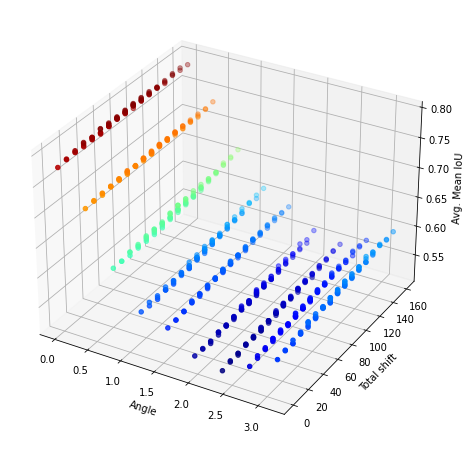

In [19]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.scatter(angles, total_shift, avg_iou, c=avg_iou, cmap="jet")
ax.set_xlabel("Angle")
ax.set_ylabel("Total shift")
ax.set_zlabel("Avg. Mean IoU")
plt.show()

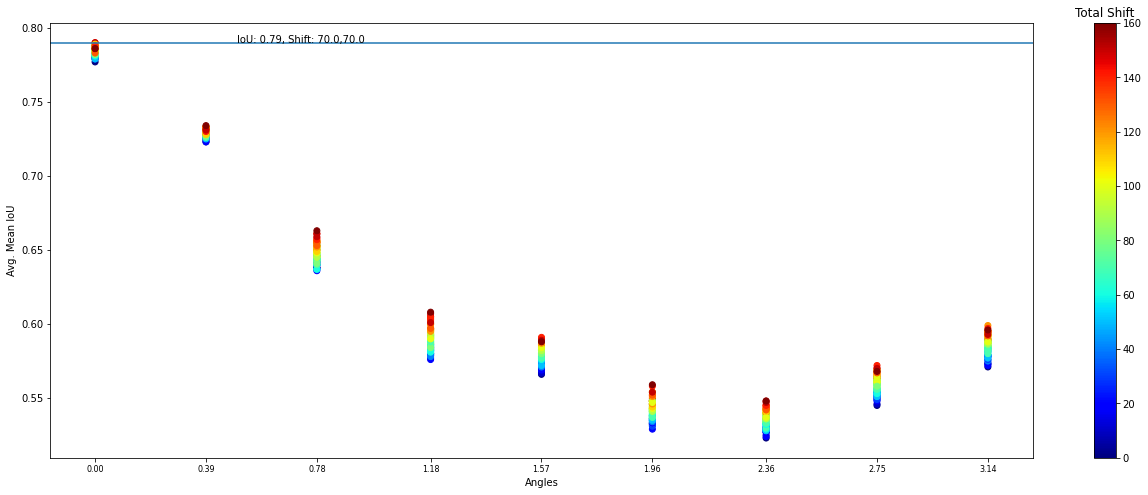

In [21]:

plt.figure(figsize=(22, 8))
plt.axes()

sct = plt.scatter(angles, avg_iou, c=total_shift, cmap="jet")
plt.xticks(np.unique(angles), fontsize=8)
clb = plt.colorbar()
clb.ax.set_title("Total Shift")
plt.axhline(np.max(avg_iou))
plt.text(0.5, np.max(avg_iou), hline_str)
# plt.axvline(0.0)

plt.xlabel("Angles")
plt.ylabel("Avg. Mean IoU")
plt.show()



# Threshold Plots

In [34]:
DATA_DIR = os.path.join(os.getcwd(), "data")
ROOT_FOLDER = os.path.join(DATA_DIR, "threshold_test")
CSV_PATH = os.path.join(ROOT_FOLDER, "th_slice_var_500.csv")

In [35]:
df = pd.read_csv(CSV_PATH)

th_values = df["Th_Value"].to_numpy()
iou = df["IoU"].to_numpy()

max_row = df.iloc[df['IoU'].idxmax()]
hline_str = f"IoU: {np.round(max_row['IoU'], 3)}, Th_Values: {max_row['Th_Value']}"

print(f"Best record: {max_row}")

Best record: Unnamed: 0    11.000000
Th_Value       0.650000
IoU            0.848448
Name: 11, dtype: float64


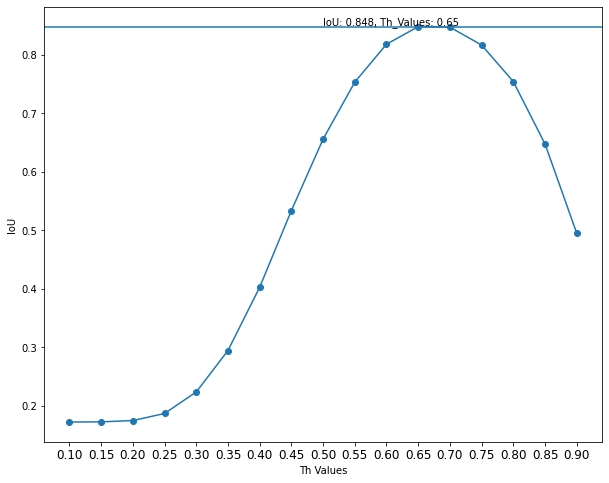

In [39]:
plt.figure(figsize=(10, 8))
plt.axes()

# sct = plt.scatter(th_values, iou, c=iou, cmap="jet")
plt.plot(th_values, iou, "-o")
plt.xticks(np.unique(th_values), fontsize=12)
plt.axhline(np.max(iou))
plt.text(0.5, np.max(iou) + .003, hline_str)

plt.xlabel("Th Values")
plt.ylabel("IoU")
plt.show()
